## ✅ ENTRENANDO MODELO PARA PREDECIR EL IMPACTO DE LA CANTIDAD DE HORAS QUE USAMOS LAS REDES SOCIALES CON LA PRODUCTIVIDAD

## ✅ DATASET: https://www.kaggle.com/datasets/mahdimashayekhi/social-media-vs-productivity

## ✅ PRIMER PASO: IMPORTAR LIBRERÍAS

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
sns.set(style='whitegrid',context='notebook')

## ✅ SEGUNDO PASO: CARGAMOS EL DATASET

In [166]:
df = pd.read_csv('/content/redessociales_subset.csv')
df

,job_satisfaction_score,age,stress_level,breaks_during_work,sleep_hours,daily_social_media_time,actual_productivity_score,gender
0,6.336688,56,4.0,8,5.116546,4.180940,7.291555,Male
1,3.412427,46,7.0,7,5.103897,3.249603,5.165093,Male
2,2.474944,32,4.0,0,8.583222,3.000000,3.474053,Male
3,1.733670,60,6.0,1,6.052984,3.000000,1.774869,Female
4,9.693060,25,7.0,1,5.405706,3.000000,5.000000,Male
...,...,...,...,...,...,...,...,...
29647,2.742377,38,6.0,3,7.811812,4.833425,3.185699,Male
29648,5.000000,34,8.0,9,5.480462,1.877297,3.465815,Female
29649,6.155613,39,8.0,3,3.045393,4.437784,6.659294,Male
29650,7.854711,20,8.0,1,6.816069,3.796634,6.895583,Female


## ✅ SELECCIONAMOS COLUMNAS A UTILIZAR

In [167]:
df.columns

Index(['job_satisfaction_score', 'age', 'stress_level', 'breaks_during_work',
       'sleep_hours', 'daily_social_media_time', 'actual_productivity_score',
       'gender'],
      dtype='object')

In [ ]:
df = df[['gender', '', 'job_satisfaction_score', 'age', 'Gearbox',
       'Gears', 'Power_hp', 'Engine_Size_cc', 'Cylinders']]

In [168]:
df

,job_satisfaction_score,age,stress_level,breaks_during_work,sleep_hours,daily_social_media_time,actual_productivity_score,gender
0,6.336688,56,4.0,8,5.116546,4.180940,7.291555,Male
1,3.412427,46,7.0,7,5.103897,3.249603,5.165093,Male
2,2.474944,32,4.0,0,8.583222,3.000000,3.474053,Male
3,1.733670,60,6.0,1,6.052984,3.000000,1.774869,Female
4,9.693060,25,7.0,1,5.405706,3.000000,5.000000,Male
...,...,...,...,...,...,...,...,...
29647,2.742377,38,6.0,3,7.811812,4.833425,3.185699,Male
29648,5.000000,34,8.0,9,5.480462,1.877297,3.465815,Female
29649,6.155613,39,8.0,3,3.045393,4.437784,6.659294,Male
29650,7.854711,20,8.0,1,6.816069,3.796634,6.895583,Female


In [169]:
data_transformed_df.to_csv('redessociales_final_transformed.csv', index=False)
print("Dataset guardado como 'redessociales_final_transformed.csv'")

Dataset guardado como 'redessociales_final_transformed.csv'


## ✅ PASO 4: CODIFICACIÓN DE VARIABLES CATEGORICAS CON SKLEARN


## ✅ 4.1 IDENTIFICAMOS VARIABLES CATEGÓRICAS




In [170]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['gender'], dtype='object')

## ✅ 4.2 CREAMOS LISTA POR TIPO DE CODIFICACIÓN

In [171]:
for cc in categorical_columns:
  print("*"*50)
  print(df[cc].value_counts())

**************************************************
gender
Male      14265
Female    14225
Other      1162
Name: count, dtype: int64


In [122]:
onehot_cols = ['gender']

## ✅ 4.3 CODIFICAMOS USANDO LOS MODULSO COMPOSE Y PREPROCESSING DE SKLEARN

In [172]:
import sklearn.compose
import sklearn.preprocessing

## ✅ 4.3.1 CREAMOS UN TRANSFORMER

In [173]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(),onehot_cols),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), ['gender'])])

## ✅ 4.3.2 APLICAMOS EL TRANSFOMER A EL DATASET

In [174]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df),
        columns = transformer.get_feature_names_out(),
        index=df.index
    )
)
data_transformed_df

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__gender_Other,remainder__job_satisfaction_score,remainder__age,remainder__stress_level,remainder__breaks_during_work,remainder__sleep_hours,remainder__daily_social_media_time,remainder__actual_productivity_score
0,0.0,1.0,0.0,6.336688,56.0,4.0,8.0,5.116546,4.180940,7.291555
1,0.0,1.0,0.0,3.412427,46.0,7.0,7.0,5.103897,3.249603,5.165093
2,0.0,1.0,0.0,2.474944,32.0,4.0,0.0,8.583222,3.000000,3.474053
3,1.0,0.0,0.0,1.733670,60.0,6.0,1.0,6.052984,3.000000,1.774869
4,0.0,1.0,0.0,9.693060,25.0,7.0,1.0,5.405706,3.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...
29647,0.0,1.0,0.0,2.742377,38.0,6.0,3.0,7.811812,4.833425,3.185699
29648,1.0,0.0,0.0,5.000000,34.0,8.0,9.0,5.480462,1.877297,3.465815
29649,0.0,1.0,0.0,6.155613,39.0,8.0,3.0,3.045393,4.437784,6.659294
29650,1.0,0.0,0.0,7.854711,20.0,8.0,1.0,6.816069,3.796634,6.895583


In [175]:
data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,gender_Female,gender_Male,gender_Other,job_satisfaction_score,age,stress_level,breaks_during_work,sleep_hours,daily_social_media_time,actual_productivity_score
0,0.0,1.0,0.0,6.336688,56.0,4.0,8.0,5.116546,4.180940,7.291555
1,0.0,1.0,0.0,3.412427,46.0,7.0,7.0,5.103897,3.249603,5.165093
2,0.0,1.0,0.0,2.474944,32.0,4.0,0.0,8.583222,3.000000,3.474053
3,1.0,0.0,0.0,1.733670,60.0,6.0,1.0,6.052984,3.000000,1.774869
4,0.0,1.0,0.0,9.693060,25.0,7.0,1.0,5.405706,3.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...
29647,0.0,1.0,0.0,2.742377,38.0,6.0,3.0,7.811812,4.833425,3.185699
29648,1.0,0.0,0.0,5.000000,34.0,8.0,9.0,5.480462,1.877297,3.465815
29649,0.0,1.0,0.0,6.155613,39.0,8.0,3.0,3.045393,4.437784,6.659294
29650,1.0,0.0,0.0,7.854711,20.0,8.0,1.0,6.816069,3.796634,6.895583


In [176]:
data_transformed_df.dtypes

,0
gender_Female,float64
gender_Male,float64
gender_Other,float64
job_satisfaction_score,float64
age,float64
stress_level,float64
breaks_during_work,float64
sleep_hours,float64
daily_social_media_time,float64
actual_productivity_score,float64


In [177]:
data_transformed_df.to_csv('redessociales_transformed.csv',index=None)

In [178]:
data_transformed_df = pd.read_csv('/content/redessociales_transformed.csv')
data_transformed_df

,gender_Female,gender_Male,gender_Other,job_satisfaction_score,age,stress_level,breaks_during_work,sleep_hours,daily_social_media_time,actual_productivity_score
0,0.0,1.0,0.0,6.336688,56.0,4.0,8.0,5.116546,4.180940,7.291555
1,0.0,1.0,0.0,3.412427,46.0,7.0,7.0,5.103897,3.249603,5.165093
2,0.0,1.0,0.0,2.474944,32.0,4.0,0.0,8.583222,3.000000,3.474053
3,1.0,0.0,0.0,1.733670,60.0,6.0,1.0,6.052984,3.000000,1.774869
4,0.0,1.0,0.0,9.693060,25.0,7.0,1.0,5.405706,3.000000,5.000000
...,...,...,...,...,...,...,...,...,...,...
29647,0.0,1.0,0.0,2.742377,38.0,6.0,3.0,7.811812,4.833425,3.185699
29648,1.0,0.0,0.0,5.000000,34.0,8.0,9.0,5.480462,1.877297,3.465815
29649,0.0,1.0,0.0,6.155613,39.0,8.0,3.0,3.045393,4.437784,6.659294
29650,1.0,0.0,0.0,7.854711,20.0,8.0,1.0,6.816069,3.796634,6.895583


## ✅ PASO 5 - CORRELACIONES

In [179]:
corr_matrix = data_transformed_df.corr()
corr_charges = corr_matrix['actual_productivity_score']
corr_charges.sort_values(ascending=False)

,actual_productivity_score
actual_productivity_score,1.000000
job_satisfaction_score,0.809515
age,0.009651
gender_Female,0.002172
gender_Male,0.002032
stress_level,0.000347
breaks_during_work,-0.003758
sleep_hours,-0.005401
daily_social_media_time,-0.005756
gender_Other,-0.010824


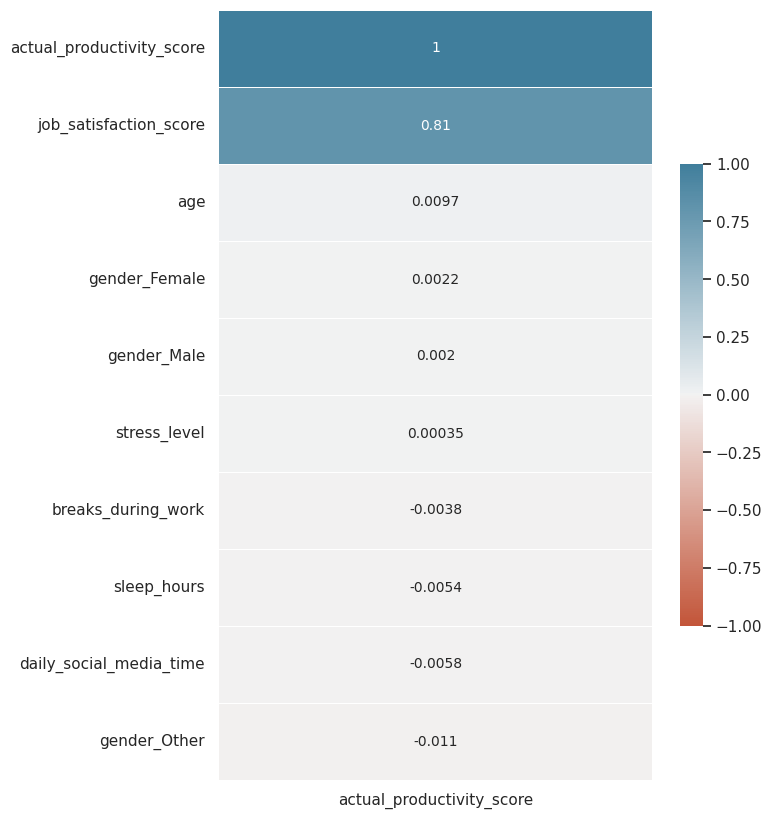

In [180]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 10))

sns.heatmap(
    data=corr_charges.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.6},
    annot=True,
    annot_kws={"size": 10}
)

plt.show()


## ✅ PASO 6 - IDENTIFICAMOS VARIABLE X y Y , DIVIDIMOS EN TRAIN TEST

In [181]:
cols = corr_charges.index.tolist()
cols.remove('actual_productivity_score')
cols

['gender_Female',
 'gender_Male',
 'gender_Other',
 'job_satisfaction_score',
 'age',
 'stress_level',
 'breaks_during_work',
 'sleep_hours',
 'daily_social_media_time']

In [196]:
X = data_transformed_df[cols].values
y = data_transformed_df['actual_productivity_score'].values.reshape(-1,1)

In [197]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

## ✅ CREAMOS UN CODIGO PARA PODER EVALUAR VARIOS MODELOS

## 1 - IMPORTAMOS LIBRERÍAS

In [184]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## 2 - ESCALAMIENTO DE DATOS

In [198]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

## 3 - CREAMOS DICCIONARIO DE MODELOS

In [186]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "SVR": SVR(kernel='rbf'),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

## 4 - CREAMOS BUCLE PARA PROBAR CADA MODELO DEL DICCIONARIO

In [199]:
results = {}
for name,model in models.items():

  model.fit(X_train_scaled,y_train_scaled.ravel())
  y_pred_scaled = model.predict(X_test_scaled)

  r2 = r2_score(y_test_scaled, y_pred_scaled)
  mse = mean_squared_error(y_test_scaled, y_pred_scaled)
  mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
  results[name] = {"R2": r2, "MSE": mse, "MAE": mae}

## ✅ MOSTRAMOS RESULTADOS DE LOS MODELOS ENTRENADOS

In [188]:
results_df = pd.DataFrame(results).T
print("Model Comparison:")
display(results_df)

Model Comparison:


,R2,MSE,MAE
Linear Regression,0.655610,0.350568,0.460237
Lasso,0.645232,0.361132,0.475681
Ridge,0.655610,0.350569,0.460239
KNN Regressor,0.610369,0.396621,0.501121
SVR,0.654403,0.351797,0.458419
Random Forest Regressor,0.639004,0.367472,0.471367


## ✅ BUSCAMOS EL MEJOR MODELO

In [189]:
best_r2_model = results_df['R2'].idxmax()
best_mse_model = results_df['MSE'].idxmin()
print(f"\nBest model based on R2: {best_r2_model} (R2: {results_df.loc[best_r2_model, 'R2']:.4f})")
print(f"Best model based on MSE: {best_mse_model} (MSE: {results_df.loc[best_mse_model, 'MSE']:.2f})")


Best model based on R2: Linear Regression (R2: 0.6556)
Best model based on MSE: Linear Regression (MSE: 0.35)


## ✅ GRAFICAMOS RESULTADOS

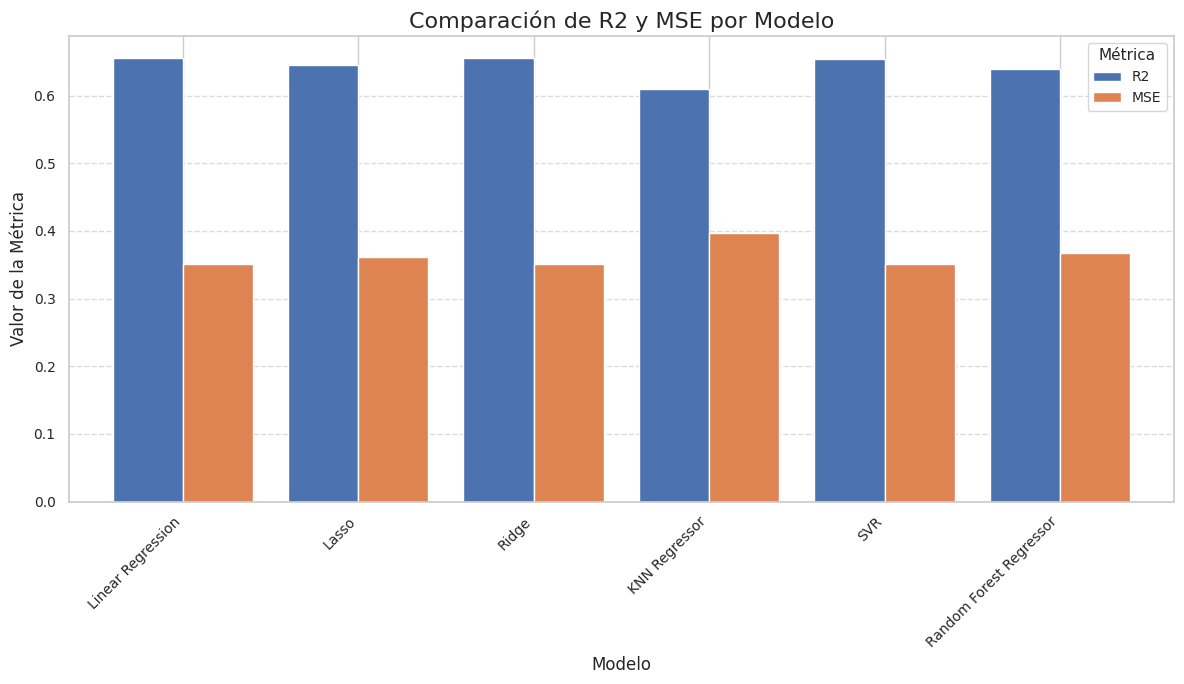

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las métricas R2 y MSE para comparar
results_to_plot = results_df[['R2', 'MSE']]

# Crear el gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 7))
results_to_plot.plot(kind='bar', ax=ax, width=0.8)

plt.title('Comparación de R2 y MSE por Modelo', fontsize=16)
plt.ylabel('Valor de la Métrica', fontsize=12)
plt.xlabel('Modelo', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Métrica', fontsize=10, title_fontsize='11')
plt.tight_layout()
plt.show()

## ✅ APP MODELO

In [200]:
import joblib
import numpy as np

# Save the best model and scalers after fitting them
best_model = models[best_r2_model]
joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler_X, 'scaler_X.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

['scaler_y.pkl']

In [201]:
# Load the best model and scalers
model = joblib.load('model.pkl')
scaler_X = joblib.load('scaler_X.pkl')
scaler_y = joblib.load('scaler_y.pkl')

def predict_productividad(new_data):
  # Ensure new_data is a 2D array for scaling
  new_data_array = np.array(new_data).reshape(1, -1)

  # Scale the input data
  new_data_scaled = scaler_X.transform(new_data_array)

  # Make prediction using the model
  prediction_scaled = model.predict(new_data_scaled)

  # Inverse transform the prediction to get original price scale
  prediction = scaler_y.inverse_transform(prediction_scaled.reshape(1, -1))

  return prediction[0][0]

print("Model and scalers loaded. You can now use the 'predict_productividad' function.")

Model and scalers loaded. You can now use the 'predict_productividad' function.


In [193]:
gender_name = {
    'gender_Female': [1.0,0.0,0.0],
    'gender_Male': [0.0,1.0,0.0],
    'gender_Other': [0.0,0.0,1.0],
}

In [209]:
gender = 'gender_Female'
job_satisfaction_score = 8
age = 40
stress_level = 2
breaks_during_work = 5
sleep_hours = 10
daily_social_media_time = 2
data_list = gender_name[gender] + [job_satisfaction_score, age, stress_level, breaks_during_work, sleep_hours, daily_social_media_time]
data_list

[1.0, 0.0, 0.0, 8, 40, 2, 5, 10, 2]

In [210]:
new_productividad_data = np.array(data_list)

predicted_productividad = predict_productividad(new_productividad_data)
print(f"Predecir Productividad: {predicted_productividad:.3f} ESCALA 1-10")

Predecir Productividad: 7.151 ESCALA 1-10


In [217]:
import gradio as gr
gender_name = {
    'gender_Female': [1.0,0.0,0.0],
    'gender_Male': [0.0,1.0,0.0],
    'gender_Other': [0.0,0.0,1.0],
}
def predict_productividad_escala_gradio(gender_str, job_satisfaction_score, age, stress_level,breaks_during_work,sleep_hours, daily_social_media_time):
    # Get the one-hot encoding for the selected gender
    gender_encoding = gender_name[gender_str]

    # Combine with
    data_list = gender_encoding + [job_satisfaction_score, age, stress_level, breaks_during_work, sleep_hours, daily_social_media_time]
    new_productividad_data = np.array(data_list)

    # Make prediction using the existing predict_productividad function
    predicted_productividad = predict_productividad(new_house_data)
    return f"Predicted Productividad: {predicted_productividad:} ESCALA 1-10"

In [218]:
# Get the list of genders for the dropdown
gender_choices = list(gender_name.keys())

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_productividad_escala_gradio,
    inputs=[
        gr.Dropdown(choices=gender_choices, label="gender"),
        gr.Number(label="job_satisfaction_score (1-10)"),
        gr.Number(label="age (18-100)"),
        gr.Number(label="stress_level (1-10)"),
        gr.Number(label="breaks_during_work (0-10)"),
        gr.Number(label="sleep_hours (horas)"),
        gr.Number(label="daily_social_media_time (horas)")
    ],
    outputs=gr.Label(label="Predicted Productividad"),
    title="Predictor Productividad",
    description="Predecir la productividad en el trabajo"
)

# Launch the app
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b23b831ffb38252ea5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
